### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

In [1]:
import pandas as pd
import seaborn as sns
anime = pd.read_csv('Anime.csv', sep=',')
    
anime.head()

,ID,Title,English,Synopsis,Type,Episodes,Status,Start_Aired,End_Aired,Premiered,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25,Finished Airing,7-Apr-13,29-Sep-13,Spring 2013,...,"Gore, Military, Survival",Shounen,24,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37,Finished Airing,4-Oct-06,27-Jun-07,Fall 2006,...,Psychological,Shounen,23,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64,Finished Airing,5-Apr-09,4-Jul-10,Spring 2009,...,Military,Shounen,24,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12,Finished Airing,5-Oct-15,21-Dec-15,Fall 2015,...,"Parody, Super Power",Seinen,24,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25,Finished Airing,8-Jul-12,23-Dec-12,Summer 2012,...,"Love Polygon, Video Game",Unknown,23,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


## Type

<AxesSubplot:xlabel='Type', ylabel='Score'>

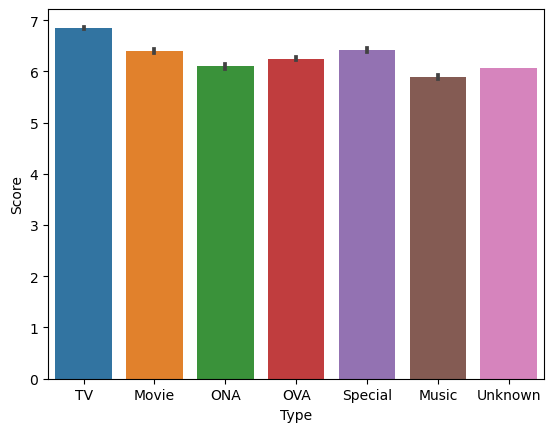

In [2]:
sns.barplot(y="Score", x="Type", data=anime)

<AxesSubplot:xlabel='Type', ylabel='Duration_Minutes'>

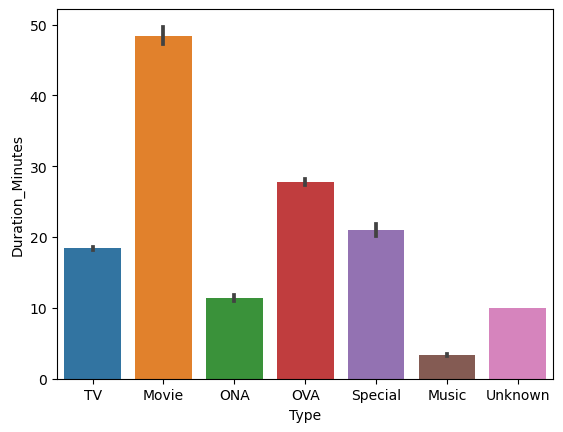

In [3]:
sns.barplot(y="Duration_Minutes", x="Type", data=anime)

<AxesSubplot:xlabel='Type', ylabel='Ranked'>

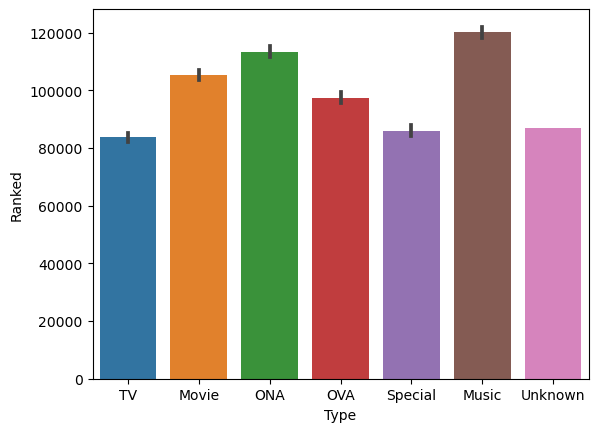

In [4]:
sns.barplot(y="Ranked", x="Type", data=anime)

<AxesSubplot:xlabel='Type', ylabel='Members'>

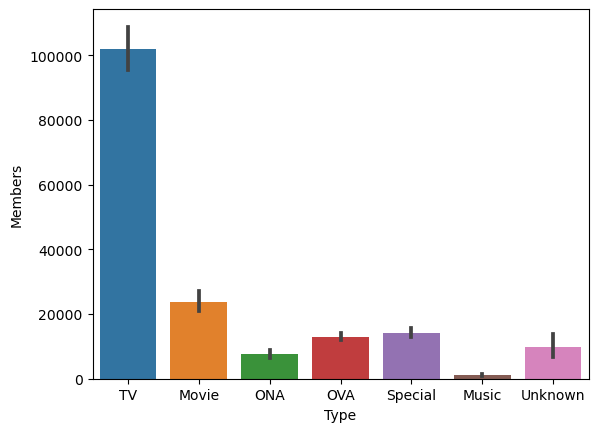

In [5]:
sns.barplot(y="Members", x="Type", data=anime)

<AxesSubplot:xlabel='Type', ylabel='Popularity'>

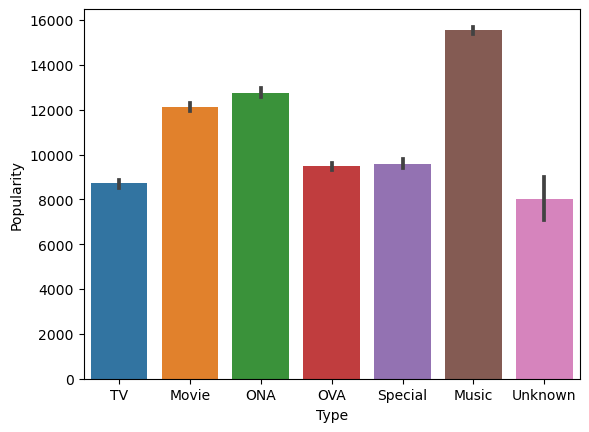

In [6]:
sns.barplot(y="Popularity", x="Type", data=anime)

## Rating 

<AxesSubplot:xlabel='Score', ylabel='Rating'>

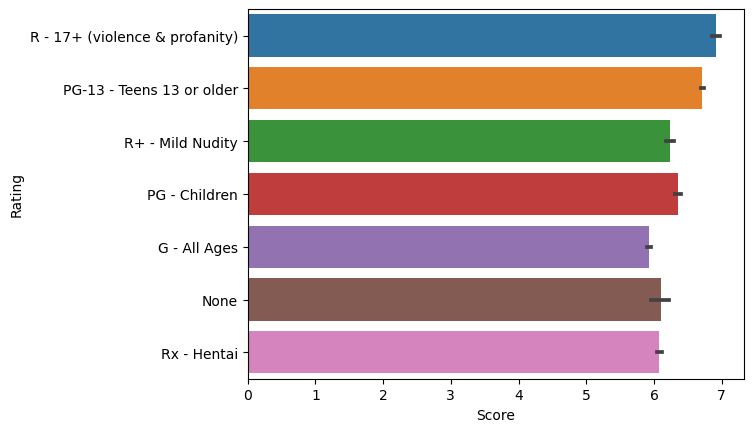

In [7]:
sns.barplot(y="Rating", x="Score", data=anime)

<AxesSubplot:xlabel='Duration_Minutes', ylabel='Rating'>

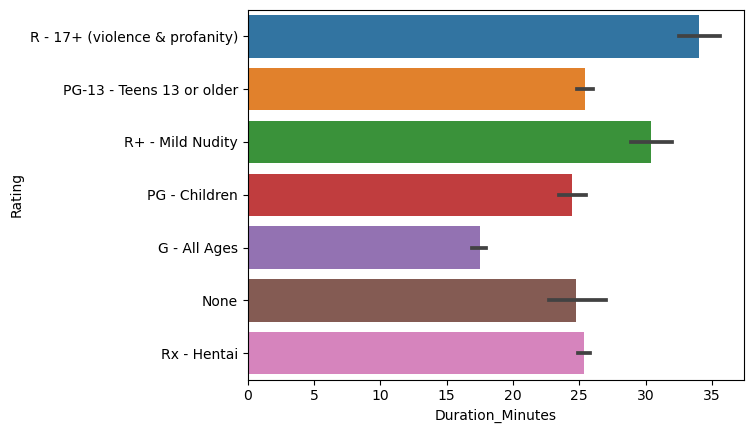

In [8]:
sns.barplot(y="Rating", x="Duration_Minutes", data=anime)

<AxesSubplot:xlabel='Ranked', ylabel='Rating'>

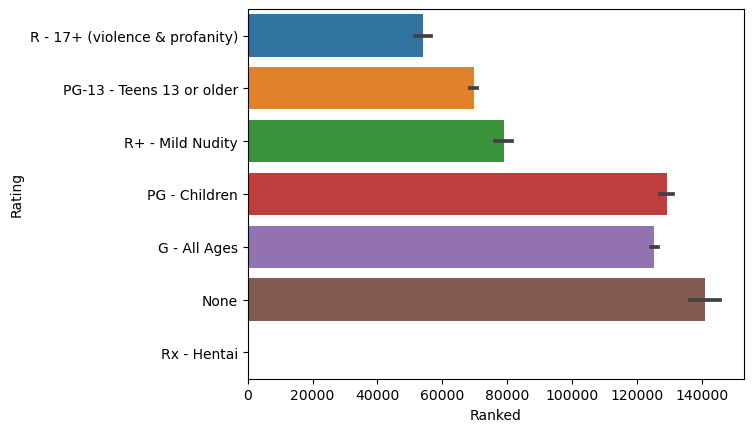

In [9]:
sns.barplot(y="Rating", x="Ranked", data=anime)

<AxesSubplot:xlabel='Members', ylabel='Rating'>

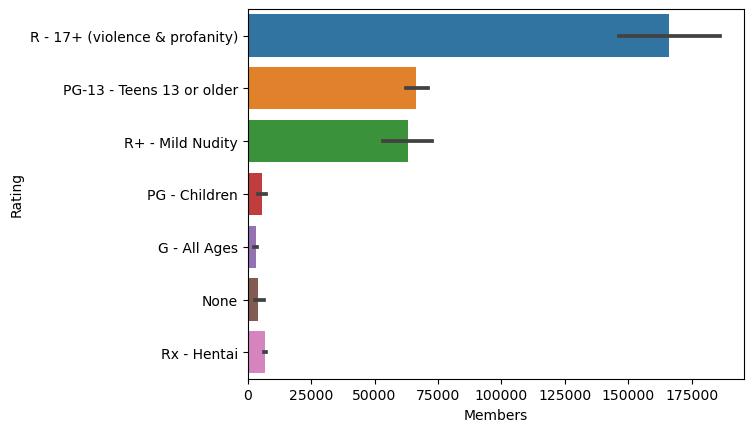

In [10]:
sns.barplot(y="Rating", x="Members", data=anime)

<AxesSubplot:xlabel='Popularity', ylabel='Rating'>

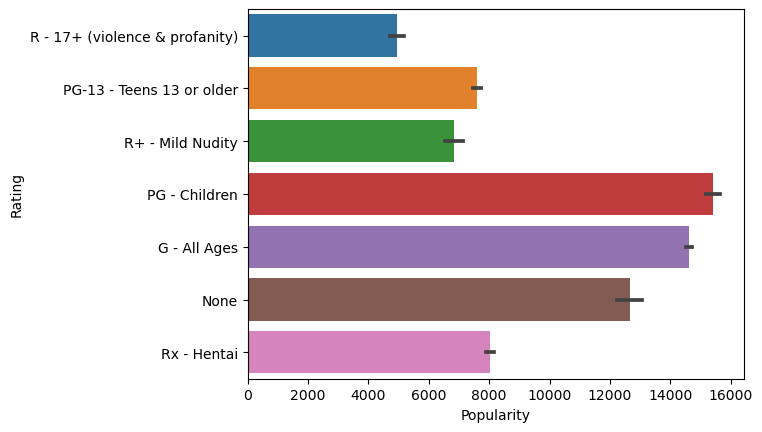

In [11]:
sns.barplot(y="Rating", x="Popularity", data=anime)

# Assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.

Do you expect their to be a correlation between the two columns?
Create a contingency table. Do you observe different ratios between categories here?
Create a bar plot for this contingency table. Do you observe different ratios between categories here?
Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [14]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [15]:
animeTypeVsRatingTable = create_contingency_table(anime, 'Type','Rating')
animeTypeVsSourceTable = create_contingency_table(anime, 'Type','Source')
animeTypeVsStatusTable = create_contingency_table(anime, 'Type','Status')

In [16]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

<AxesSubplot:xlabel='Rating'>

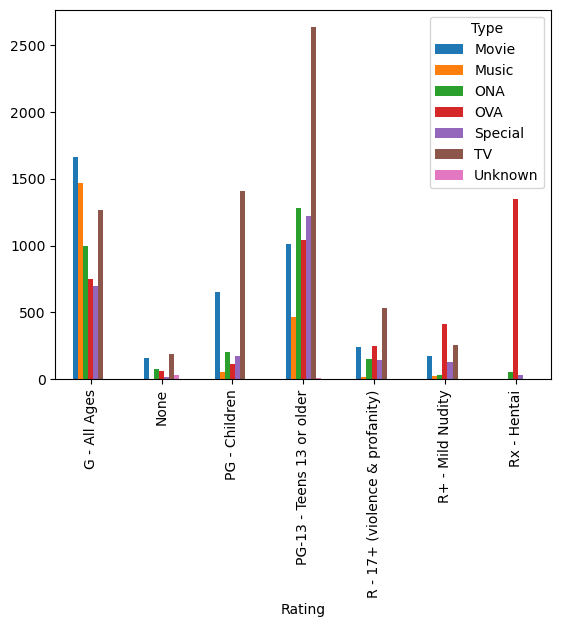

In [17]:
animeTypeVsRatingTable.plot(kind='bar')

In [18]:
check_cat_vs_cat_correlation(anime, 'Type','Rating')

The odds of a correlation between Type and Rating is 100.0% (Based on a p value of 0.0).
This percentage needs to be at least 95% for a significant correlation.


<AxesSubplot:xlabel='Source'>

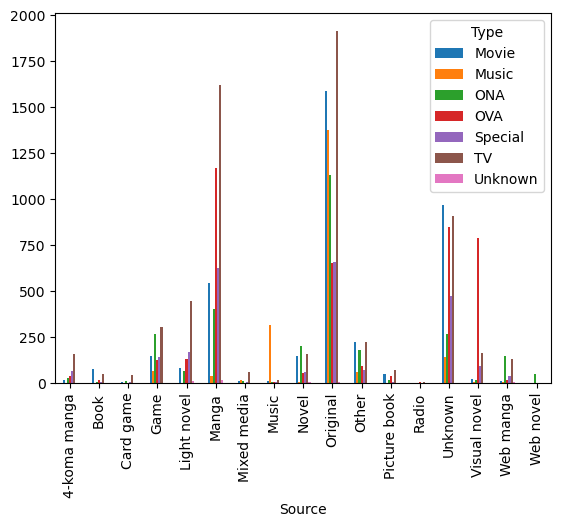

In [19]:
animeTypeVsSourceTable.plot(kind='bar')

In [20]:
check_cat_vs_cat_correlation(anime, 'Type','Source')

The odds of a correlation between Type and Source is 100.0% (Based on a p value of 0.0).
This percentage needs to be at least 95% for a significant correlation.


<AxesSubplot:xlabel='Status'>

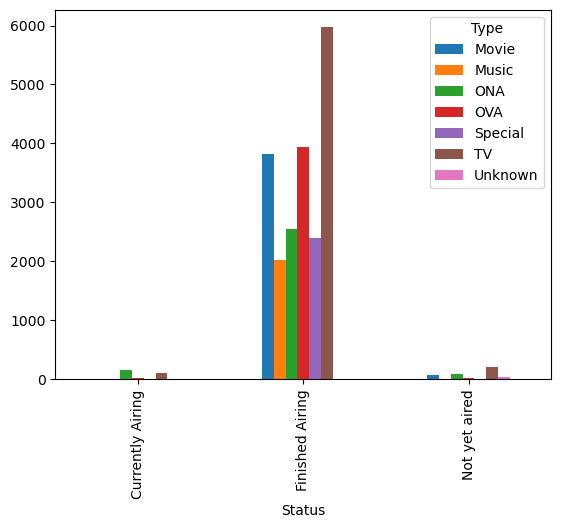

In [21]:
animeTypeVsStatusTable.plot(kind='bar')

In [22]:
check_cat_vs_cat_correlation(anime, 'Type','Status')

The odds of a correlation between Type and Status is 100.0% (Based on a p value of 0.0).
This percentage needs to be at least 95% for a significant correlation.
